# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.667678e+01     1.404224e+01
 * time: 0.0013151168823242188
     1     3.086372e+01     8.229667e+00
 * time: 0.00625300407409668
     2     2.917656e+01     7.449251e+00
 * time: 0.011153936386108398
     3     2.244221e+01     3.292233e+00
 * time: 0.016180992126464844
     4     1.998651e+01     1.779708e+00
 * time: 0.02105093002319336
     5     1.954580e+01     3.055647e+00
 * time: 0.02506709098815918
     6     1.911197e+01     2.052004e+00
 * time: 0.02912592887878418
     7     1.875728e+01     2.176930e+00
 * time: 0.03314399719238281
     8     1.831395e+01     1.642782e+00
 * time: 0.03713393211364746
     9     1.807899e+01     1.374552e+00
 * time: 0.0411219596862793
    10     1.778595e+01     8.576520e-01
 * time: 0.04518890380859375
    11     1.755610e+01     7.053439e-01
 * time: 0.0492100715637207
    12     1.744986e+01     6.966992e-01
 * time: 0.053260087966918945
    13     1.742449e+01     8.653458e-01
 * ti

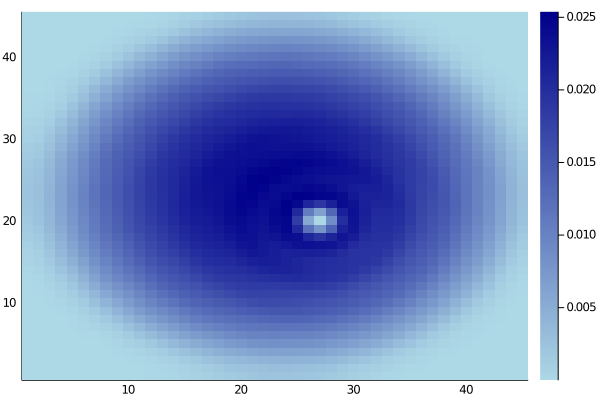

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)